<a href="https://colab.research.google.com/github/sadoky/Pandas/blob/master/RED_GRU_intervalos_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:


import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler






#[dataset['AirTemp'].iloc[0:8700]]

In [26]:
dataset=pd.read_csv('https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv')


In [27]:
set_entrenamiento1= (dataset["Ghi"].iloc[0:4000])
set_validacion1 = dataset["Ghi"].iloc[4000:4039]

In [28]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento=set_entrenamiento1.values.reshape(-1,1)
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

In [29]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
from keras.models import Sequential
from keras.layers import GRU, Dense

In [32]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

In [33]:
modelo = Sequential()

In [34]:
modelo.add(GRU(units=na, input_shape=dim_entrada))

In [35]:
modelo.add(Dense(units=dim_salida))

In [36]:
from keras.callbacks import learning_rate_schedule
modelo.compile(optimizer="adam", loss='mse')

In [37]:
history=modelo.fit(X_train,Y_train,epochs=20,batch_size=32,verbose=2)


Epoch 1/20
124/124 - 5s - loss: 0.0191 - 5s/epoch - 43ms/step
Epoch 2/20
124/124 - 3s - loss: 0.0021 - 3s/epoch - 27ms/step
Epoch 3/20
124/124 - 3s - loss: 0.0016 - 3s/epoch - 27ms/step
Epoch 4/20
124/124 - 3s - loss: 0.0012 - 3s/epoch - 27ms/step
Epoch 5/20
124/124 - 3s - loss: 0.0011 - 3s/epoch - 26ms/step
Epoch 6/20
124/124 - 3s - loss: 9.3604e-04 - 3s/epoch - 26ms/step
Epoch 7/20
124/124 - 3s - loss: 8.4386e-04 - 3s/epoch - 27ms/step
Epoch 8/20
124/124 - 3s - loss: 7.5730e-04 - 3s/epoch - 27ms/step
Epoch 9/20
124/124 - 3s - loss: 7.1400e-04 - 3s/epoch - 26ms/step
Epoch 10/20
124/124 - 3s - loss: 6.5664e-04 - 3s/epoch - 26ms/step
Epoch 11/20
124/124 - 3s - loss: 6.3803e-04 - 3s/epoch - 27ms/step
Epoch 12/20
124/124 - 3s - loss: 5.6506e-04 - 3s/epoch - 27ms/step
Epoch 13/20
124/124 - 3s - loss: 5.3628e-04 - 3s/epoch - 26ms/step
Epoch 14/20
124/124 - 3s - loss: 5.2336e-04 - 3s/epoch - 27ms/step
Epoch 15/20
124/124 - 3s - loss: 5.1913e-04 - 3s/epoch - 27ms/step
Epoch 16/20
124/124 - 3s

In [38]:


history_dict = history.history
print(history_dict.keys())

dict_keys(['loss'])


In [39]:
x_test = set_validacion1.values
x_test=x_test.reshape(-1,1)
x_test = sc.transform(x_test)

In [40]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)


In [41]:
prediccion = modelo.predict(x_test)
prediccion = sc.inverse_transform(prediccion)
prediccion2=pd.DataFrame(prediccion)


In [42]:
prediccion2


,0
0,375.868622
1,353.287109
2,323.964996
3,290.919983
4,254.231171
5,215.900421
6,197.800613
7,193.049210
8,185.457245
9,175.039124


In [43]:
xaxis=np.arange(start=0,stop=43500,step=5)



In [44]:
url='https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv'
df=pd.read_csv(url)
datos_train=df["Ghi"].iloc[0:4000]
datos_val=df["Ghi"].iloc[4001:4039]

datos_val


4001    342
4002    312
4003    278
4004    240
4005    200
4006    181
4007    176
4008    168
4009    157
4010    140
4011    120
4012    103
4013     89
4014     74
4015     58
4016     44
4017     32
4018     20
4019      8
4020      2
4021      1
4022      0
4023      0
4024      0
4025      0
4026      0
4027      0
4028      0
4029      0
4030      0
4031      0
4032      0
4033      0
4034      0
4035      0
4036      0
4037      0
4038      0
Name: Ghi, dtype: int64

In [45]:
from numpy.matrixlib.defmatrix import concatenate

j=np.zeros(4000,int)
pred44=pd.DataFrame(j)
pred56=np.asarray(prediccion2,dtype=np.float64)

pred56=pred56.reshape(-1,1)
pred57=j.reshape(-1,1)
pred56





array([[375.86862183],
       [353.28710938],
       [323.96499634],
       [290.91998291],
       [254.23117065],
       [215.90042114],
       [197.8006134 ],
       [193.04920959],
       [185.45724487],
       [175.03912354],
       [158.98625183],
       [140.17604065],
       [124.25263977],
       [111.18495941],
       [ 97.23029327],
       [ 82.39894104],
       [ 69.46747589],
       [ 58.41792679],
       [ 47.4005928 ],
       [ 36.41579056],
       [ 30.93568611],
       [ 30.02313423],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696],
       [ 29.11081696]])

In [46]:
lim=np.concatenate((pred57,pred56))
lim
lim2=pd.DataFrame(lim)
prediccion_final=lim2[4000:]

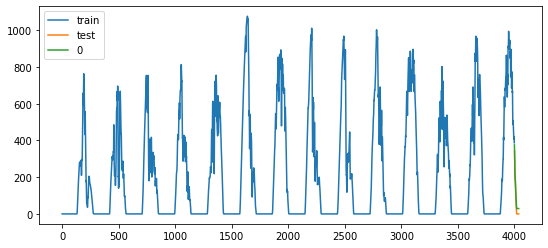

In [47]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
prediccion_final.plot(ax=ax,label="predict")

ax.legend();

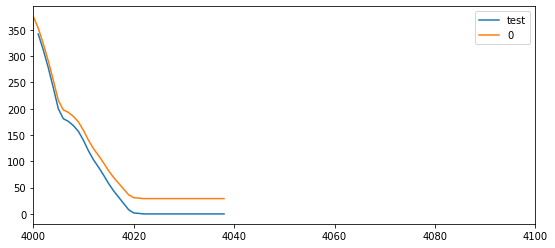

In [48]:
fig, ax = plt.subplots(figsize=(9, 4))
#datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
lim2.plot(ax=ax, label='predict')
plt.xlim(4000,4100)
ax.legend();



